In [1]:
# from flair.models import TextClassifier
# from flair.data import Sentence
# classifier = TextClassifier.load('en-sentiment')
# sentence = Sentence('ache is bad!')
# classifier.predict(sentence)
# # print sentence with predicted labels
# print('Sentence above is: ', sentence.labels)

In [2]:
# !pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI)
print(p.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor'))
print(p.tokenize('Preprocessor is #awesome 👍 https://github.com/s/preprocessor'))

Preprocessor is #awesome
Preprocessor is #awesome $EMOJI$ $URL$


In [3]:
import pandas as pd
import numpy as np
import itertools
import codecs
import os
import re

In [4]:
# get the current working directory
data_path = os.getcwd()+'/Datasets/'
# os.path.abspath(os.path.join(os.path.dirname( '__file__' ), '..', 'Datasets'))+'/'

# Although the dataset says csv, it is tab delimited. In addition to this, they have severe codels problems. 
# So best to parse throught codes first. 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 2: invalid start byte

#open for reading with "universal" type set

import codecs

doc_d_t = codecs.open(data_path+'train'+'.tsv','rU','UTF-8') 
df_train = pd.read_csv(doc_d_t, sep='\t', na_filter = False)
df_train.rename(columns={"Text": "text", "Label": "label"}, inplace=True)

df_train.reset_index(inplace=True)

In [5]:
import matplotlib.pyplot as plt

labels_count = df_train['label'].value_counts()
labels_count.plot(kind="bar")
print(df_train['label'].value_counts())

UNINFORMATIVE    3663
INFORMATIVE      3273
Name: label, dtype: int64


In [6]:
# from sklearn.model_selection import train_test_split

# data = df_train
# # data['label'] = '__label__' + data['label'].astype(str)
# # data.iloc[0:int(len(data)*0.8)].to_csv(data_loc+'train.csv', sep='\t', index = False, header = False)
# # data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv(data_loc+'test.csv', sep='\t', index = False, header = False)
# # data.iloc[int(len(data)*0.9):].to_csv(data_loc+'dev.csv', sep='\t', index = False, header = False);

# df_train, df_valid = train_test_split(data, test_size=0.1, stratify=data['label'])
# df_train, df_test = train_test_split(df_train, test_size=0.1, stratify=df_train['label'])

doc_d_t = codecs.open(data_path+'valid'+'.tsv','rU','UTF-8') 
df_valid = pd.read_csv(doc_d_t, sep='\t', na_filter = False)
df_valid.rename(columns={"Text": "text", "Label": "label"}, inplace=True)

df_valid.reset_index(inplace=True)

UNINFORMATIVE    528
INFORMATIVE      472
Name: label, dtype: int64


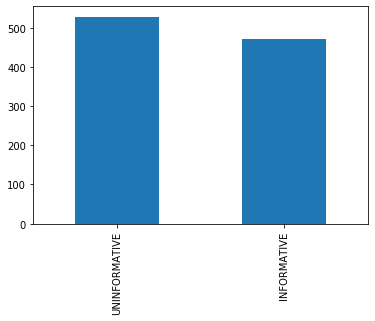

In [7]:
labels_count = df_valid['label'].value_counts()
labels_count.plot(kind="bar")
print(df_valid['label'].value_counts())

In [14]:
df_train['text'] = df_train['text'].apply(lambda x: re.sub('["!@#$:).;,?&“⚠️—|📰]', '', x.lower()))
df_train['text'] = df_train['text'].apply(lambda x: re.sub('user', ' ', x))
df_train['text'] = df_train['text'].apply(lambda x: re.sub('  ', ' ', x))


df_valid['text'] = df_valid['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
df_valid['text'] = df_valid['text'].apply(lambda x: re.sub('user', ' ', x))
df_valid['text'] = df_valid['text'].apply(lambda x: re.sub('  ', ' ', x))


# convert to flair format
df_train['label'] = '__label__' + df_train['label'].astype(str)
df_valid['label'] = '__label__' + df_valid['label'].astype(str)





In [15]:
df_train.sample(n=100)

,index,Id,text,label
5027,5027,1245731436910374912,delhi records 93% jump in covid cases in a day...,__label__UNINFORMATIVE
65,65,1246037020641640449,trump is no friend to veterans trump was advi...,__label__UNINFORMATIVE
4540,4540,1245704032041209862,kilifi deputy governor gideon saburi makes ful...,__label__INFORMATIVE
1283,1283,1241028731839315970,raas blockade maybe both detrimental amp benef...,__label__UNINFORMATIVE
5962,5962,1242146976164167682,while the usual suspects have been bad-mouthin...,__label__UNINFORMATIVE
...,...,...,...,...
5206,5206,1245863331090427904,american citizens are being told that they are...,__label__UNINFORMATIVE
3401,3401,1247031164700786689,26 nurses amp 3 doctors tested positive source...,__label__INFORMATIVE
1278,1278,1247126672463159298,recovering from covid-19 abc’s bob woodruff’s ...,__label__INFORMATIVE
2890,2890,1249651488064000001,jenny mcgee is a nurse who helped bo jo the cl...,__label__INFORMATIVE


In [16]:
df_train[['label', 'text']].to_csv(data_path+'train.csv', index=False, header=None, sep = '\t')
df_valid[['label', 'text']].to_csv(data_path+'dev.csv', index=False, header=None, sep = '\t')
df_valid[['label', 'text']].to_csv(data_path+'test.csv', index=False, header=None, sep = '\t')

In [17]:
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.embeddings import TokenEmbeddings, PooledFlairEmbeddings, StackedEmbeddings, CharacterEmbeddings
# from flair.embeddings import BertEmbeddings
# from flair.embeddings import ELMoEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from typing import List


# elmo_embeddings_pubmed = ELMoEmbeddings('pubmed')


In [18]:
corpus = NLPTaskDataFetcher.load_classification_corpus(Path(data_path), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')


2020-08-10 16:37:25,139 Reading data from /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Notebooks/Contextual NER/Datasets
2020-08-10 16:37:25,143 Train: /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Notebooks/Contextual NER/Datasets/train.csv
2020-08-10 16:37:25,145 Dev: /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Notebooks/Contextual NER/Datasets/dev.csv
2020-08-10 16:37:25,146 Test: /nfs/gns/literature/Santosh_Tirunagari/GitHub/Unsupervised-Protein-Genes-Diseases-Extraction/Notebooks/Contextual NER/Datasets/test.csv


/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  """Entry point for launching an IPython kernel.
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:447: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:454: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/homes/stirunag/anaconda3/envs/pytorch/lib/python3.7/site-packages/flair/data_fetcher.py:463: Depre

In [19]:
# 3. make a list of word embeddings
word_embeddings = [
                    WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                   FlairEmbeddings('news-forward'),
                   FlairEmbeddings('news-backward'),
                   CharacterEmbeddings(), 
#                    PooledFlairEmbeddings('pubmed-backward', pooling='max'),
#                    PooledFlairEmbeddings('pubmed-forward', pooling='max'),
                   # BertEmbedding('bert-large-cased'),
#                    elmo_embeddings_pubmed
                   ]



In [20]:
# document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                   rnn_type = "LSTM",
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

In [21]:
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)



2020-08-10 16:37:55,767 Computing label dictionary. Progress:


100%|██████████| 6936/6936 [00:00<00:00, 251723.57it/s]

2020-08-10 16:37:55,803 [b'INFORMATIVE', b'UNINFORMATIVE']


In [22]:
trainer = ModelTrainer(classifier, corpus)


In [23]:
import torch
torch.cuda.is_available()

True

In [25]:
# 7. start the training
# trainer.train(data_loc, max_epochs=10)

result_loc = '../flair_models/text_classification/noist_text_model/v-01'
trainer.train(result_loc,
              learning_rate=0.15,
              mini_batch_size=64,
              anneal_factor=0.5,
              patience=5,
              max_epochs=50)

2020-08-10 19:58:23,684 ----------------------------------------------------------------------------------------------------
2020-08-10 19:58:23,686 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_3): CharacterEmbeddings(
        (char_embedding): Embedding(275, 25)
        (char_rnn): LSTM(25, 25, bidirectional=True)
 

2020-08-10 20:13:07,102 epoch 5 - iter 10/109 - loss 0.19548125 - samples/sec: 34.01
2020-08-10 20:13:25,924 epoch 5 - iter 20/109 - loss 0.18689155 - samples/sec: 34.57
2020-08-10 20:13:44,579 epoch 5 - iter 30/109 - loss 0.17116250 - samples/sec: 34.81
2020-08-10 20:14:02,396 epoch 5 - iter 40/109 - loss 0.17313352 - samples/sec: 36.50
2020-08-10 20:14:20,843 epoch 5 - iter 50/109 - loss 0.19892650 - samples/sec: 35.26
2020-08-10 20:14:38,937 epoch 5 - iter 60/109 - loss 0.21169459 - samples/sec: 36.03
2020-08-10 20:14:57,233 epoch 5 - iter 70/109 - loss 0.21046703 - samples/sec: 35.58
2020-08-10 20:15:15,355 epoch 5 - iter 80/109 - loss 0.20348080 - samples/sec: 36.08
2020-08-10 20:15:34,076 epoch 5 - iter 90/109 - loss 0.19948157 - samples/sec: 34.75
2020-08-10 20:15:52,539 epoch 5 - iter 100/109 - loss 0.19663549 - samples/sec: 35.32
2020-08-10 20:16:12,714 ----------------------------------------------------------------------------------------------------
2020-08-10 20:16:12,722 

2020-08-10 20:35:01,689 epoch 11 - iter 10/109 - loss 0.17263009 - samples/sec: 34.34
2020-08-10 20:35:20,485 epoch 11 - iter 20/109 - loss 0.16278999 - samples/sec: 35.13
2020-08-10 20:35:39,003 epoch 11 - iter 30/109 - loss 0.16269088 - samples/sec: 35.98
2020-08-10 20:35:57,309 epoch 11 - iter 40/109 - loss 0.15756476 - samples/sec: 36.07
2020-08-10 20:36:15,771 epoch 11 - iter 50/109 - loss 0.15532289 - samples/sec: 35.40
2020-08-10 20:36:33,927 epoch 11 - iter 60/109 - loss 0.15321727 - samples/sec: 36.08
2020-08-10 20:36:52,692 epoch 11 - iter 70/109 - loss 0.14954742 - samples/sec: 34.84
2020-08-10 20:37:10,915 epoch 11 - iter 80/109 - loss 0.14919185 - samples/sec: 35.80
2020-08-10 20:37:29,103 epoch 11 - iter 90/109 - loss 0.14644400 - samples/sec: 36.13
2020-08-10 20:37:47,632 epoch 11 - iter 100/109 - loss 0.14851540 - samples/sec: 35.53
2020-08-10 20:38:07,357 ----------------------------------------------------------------------------------------------------
2020-08-10 20:

2020-08-10 20:56:41,900 epoch 17 - iter 0/109 - loss 0.30945301 - samples/sec: 345.34
2020-08-10 20:57:00,562 epoch 17 - iter 10/109 - loss 0.12400464 - samples/sec: 34.86
2020-08-10 20:57:18,960 epoch 17 - iter 20/109 - loss 0.11861127 - samples/sec: 35.34
2020-08-10 20:57:37,610 epoch 17 - iter 30/109 - loss 0.12566749 - samples/sec: 35.16
2020-08-10 20:57:55,213 epoch 17 - iter 40/109 - loss 0.15742253 - samples/sec: 36.94
2020-08-10 20:58:13,624 epoch 17 - iter 50/109 - loss 0.15037273 - samples/sec: 35.42
2020-08-10 20:58:32,063 epoch 17 - iter 60/109 - loss 0.15177953 - samples/sec: 35.28
2020-08-10 20:58:50,222 epoch 17 - iter 70/109 - loss 0.14611189 - samples/sec: 35.90
2020-08-10 20:59:08,415 epoch 17 - iter 80/109 - loss 0.14430162 - samples/sec: 35.75
2020-08-10 20:59:26,428 epoch 17 - iter 90/109 - loss 0.14261398 - samples/sec: 36.12
2020-08-10 20:59:44,414 epoch 17 - iter 100/109 - loss 0.14048437 - samples/sec: 36.16
2020-08-10 21:00:04,883 -----------------------------

2020-08-10 21:18:32,378 ----------------------------------------------------------------------------------------------------
2020-08-10 21:18:34,325 epoch 23 - iter 0/109 - loss 0.08434041 - samples/sec: 329.07
2020-08-10 21:18:53,229 epoch 23 - iter 10/109 - loss 0.08297737 - samples/sec: 34.39
2020-08-10 21:19:11,509 epoch 23 - iter 20/109 - loss 0.09228809 - samples/sec: 35.62
2020-08-10 21:19:29,821 epoch 23 - iter 30/109 - loss 0.08739248 - samples/sec: 35.56
2020-08-10 21:19:48,135 epoch 23 - iter 40/109 - loss 0.08289578 - samples/sec: 35.52
2020-08-10 21:20:06,500 epoch 23 - iter 50/109 - loss 0.08001583 - samples/sec: 35.40
2020-08-10 21:20:24,503 epoch 23 - iter 60/109 - loss 0.08087214 - samples/sec: 36.12
2020-08-10 21:20:42,345 epoch 23 - iter 70/109 - loss 0.08130738 - samples/sec: 36.48
2020-08-10 21:21:00,648 epoch 23 - iter 80/109 - loss 0.08623487 - samples/sec: 35.52
2020-08-10 21:21:18,739 epoch 23 - iter 90/109 - loss 0.08696000 - samples/sec: 36.06
2020-08-10 21:2

2020-08-10 21:40:07,990 DEV : loss 0.6144388914108276 - score 0.837
2020-08-10 21:40:08,207 BAD EPOCHS (no improvement): 1
2020-08-10 21:40:08,214 ----------------------------------------------------------------------------------------------------
2020-08-10 21:40:09,999 epoch 29 - iter 0/109 - loss 0.01229928 - samples/sec: 358.95
2020-08-10 21:40:28,712 epoch 29 - iter 10/109 - loss 0.05026790 - samples/sec: 34.77
2020-08-10 21:40:47,560 epoch 29 - iter 20/109 - loss 0.06623315 - samples/sec: 34.53
2020-08-10 21:41:05,758 epoch 29 - iter 30/109 - loss 0.07128277 - samples/sec: 35.81
2020-08-10 21:41:23,967 epoch 29 - iter 40/109 - loss 0.06511004 - samples/sec: 35.80
2020-08-10 21:41:42,364 epoch 29 - iter 50/109 - loss 0.06210078 - samples/sec: 35.50
2020-08-10 21:42:00,418 epoch 29 - iter 60/109 - loss 0.06564815 - samples/sec: 36.03
2020-08-10 21:42:18,594 epoch 29 - iter 70/109 - loss 0.06188842 - samples/sec: 35.82
2020-08-10 21:42:36,592 epoch 29 - iter 80/109 - loss 0.06118116

2020-08-10 22:01:36,847 EPOCH 34 done: loss 0.0499 - lr 0.0187
2020-08-10 22:01:47,735 DEV : loss 0.678863525390625 - score 0.839
2020-08-10 22:01:47,941 BAD EPOCHS (no improvement): 1
2020-08-10 22:01:47,947 ----------------------------------------------------------------------------------------------------
2020-08-10 22:01:49,696 epoch 35 - iter 0/109 - loss 0.01786403 - samples/sec: 366.28
2020-08-10 22:02:08,127 epoch 35 - iter 10/109 - loss 0.04703991 - samples/sec: 35.34
2020-08-10 22:02:26,659 epoch 35 - iter 20/109 - loss 0.03992628 - samples/sec: 35.11
2020-08-10 22:02:44,800 epoch 35 - iter 30/109 - loss 0.04486774 - samples/sec: 35.92
2020-08-10 22:03:02,994 epoch 35 - iter 40/109 - loss 0.04323262 - samples/sec: 35.74
2020-08-10 22:03:21,121 epoch 35 - iter 50/109 - loss 0.04393965 - samples/sec: 35.87
2020-08-10 22:03:26,663 ----------------------------------------------------------------------------------------------------
2020-08-10 22:03:26,666 Exiting from training ear

{'test_score': 0.844,
 'dev_score_history': [0.555,
  0.828,
  0.832,
  0.803,
  0.727,
  0.809,
  0.82,
  0.835,
  0.837,
  0.791,
  0.819,
  0.835,
  0.841,
  0.832,
  0.844,
  0.821,
  0.842,
  0.829,
  0.832,
  0.843,
  0.834,
  0.843,
  0.822,
  0.84,
  0.844,
  0.836,
  0.84,
  0.837,
  0.841,
  0.836,
  0.841,
  0.843,
  0.839,
  0.839],
 'train_loss_history': [0.25934601746021063,
  0.26088878471370136,
  0.20122337990671124,
  0.18458556353088912,
  0.1971160374376752,
  0.19905491474024747,
  0.16155755031136199,
  0.1762476840970713,
  0.1575284817623436,
  0.15164830658687364,
  0.1511629595327268,
  0.15273436131553914,
  0.15156565194761534,
  0.1581931954266828,
  0.12735884735753777,
  0.16536842806076785,
  0.14047939569578258,
  0.1211122057545896,
  0.11991347739934374,
  0.11598844067492617,
  0.10297187802236561,
  0.0897184945984718,
  0.09020770757262586,
  0.08351321878988262,
  0.0682625973494638,
  0.0690007134673929,
  0.06927958444837447,
  0.060286106883522

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load(result_loc+'/best-model.pt')


In [26]:
sentence = Sentence('The FCRL3 polymorphisms associated with rheumatoid arthritis in a Japanese population are not associated per se with rheumatoid arthritis in a Spanish population.')
# sentence = Sentence('We obtained evidence from two Caucasian study populations that the His298-allele of PTGES2 Arg298His confers to reduced risk of type 2 diabetes.')
# sentence = Sentence('it does not seem that variants in MnSOD, CAT, or GPX1 have an influence on prostate cancer risk in this cohort of men who were smokers or exposed to asbestos, although it is possible that cumulative defects in protection from oxidative stress may result in increased risk of the disease.')
classifier.predict(sentence)
print(sentence.labels)

NameError: name 'Sentence' is not defined

In [ ]:
# from tqdm import tqdm   
# with open(complete_file_path) as test:
#     print(complete_file_path)
# predicted_label = []
# for index, rows in tqdm(df.iterrows(), total=df.shape[0]):
#     if rows['label'] == 'NA':
#        ground_truth.append('Negative')
#     else:
#        ground_truth.append('Positive')
#     sentence = Sentence(rows['text'])
#     classifier.predict(sentence)
#     predicted_label.append(sentence.labels[0].value)
    
    